In [28]:
from beewalkvideotrack import BeeTrack

# Demo

In this demo we open the demo movie file, run the algorithm on it, and output some results.

In [29]:
#First, open the video file and store (low-res version) in memory
bt = BeeTrack('demovideo.mp4',fromframe=40)

Loading frames
.............................................................................................................................................................................

In [30]:
#Second, run the analysis, and compute various features.
bt.getpath()
bt.compute_features()

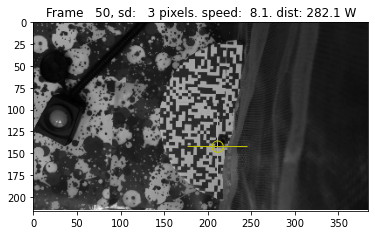

In [31]:
#Now just look at the outputs, e.g.:

bt.plotframe(50) #for example, look at frame 50

In [32]:
bt.totalwalkdist #total walk distance (pixels)

355.4385635957149

t:   2%|▏         | 2/131 [00:00<00:09, 13.82it/s, now=None]

Moviepy - Building video demoresult.mp4.
Moviepy - Writing video demoresult.mp4



Moviepy - Done !
Moviepy - video ready demoresult.mp4


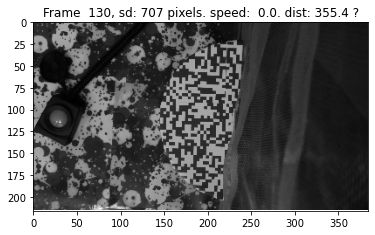

In [33]:
#this generates a new (low-res) mp4 to show the tracking behaviour
#which lets us check it's doing the right thing.
bt.makemovie('demoresult.mp4')

In [9]:
bt.grabhighres()

Loading frames
.............................................................................................................................................................................

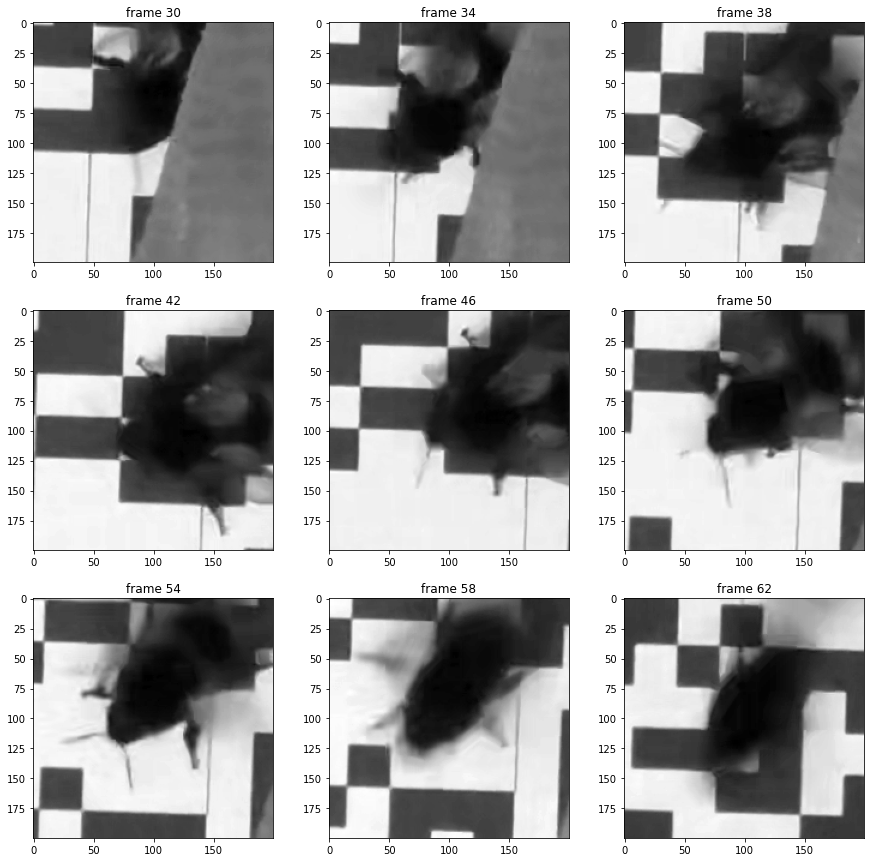

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,15])
figi=1
for i in range(30,90,4):
    if bt.highresframes[i] is not None:
        plt.subplot(3,3,figi)
        figi+=1
        plt.imshow(bt.highresframes[i],cmap='gray')
        plt.title("frame %d"  % i)
        if figi>9: break

# Batch processing

In [ ]:
#This will loop through all the images in a folder called 'data', and record how far the bee walks in each
#in a csv called 'summarywalkdist.csv'.
from glob import glob
for fn in glob('data/*.mp4'):
    newfn = fn.split('.')
    newfn = '.'.join([newfn[0]+'_track',newfn[1]])
    bt = BeeTrack(fn)
    bt.getpath()
    bt.compute_features()
    bt.makemovie(newfn)
    with open('summarywalkdist.csv', 'a') as file:
        file.write('%s,%0.1f\n' % (fn.split('/')[1],bt.totalwalkdist))